In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Data Description

In [127]:
## load the data 
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [128]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [129]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# preparation des données

In [130]:
bad_g = diabetesDF["Glucose"] == 0
diabetesDF.loc[bad_g, "Glucose"] = None
sum(diabetesDF['Glucose']==0)

0

In [131]:
bad_g = diabetesDF['BloodPressure'] == 0
diabetesDF.loc[bad_g, 'BloodPressure'] = None
sum(diabetesDF['BloodPressure']==0)

0

In [132]:
bad_s= diabetesDF['Insulin'] == 0
diabetesDF.loc[bad_s, 'Insulin'] = None
sum(diabetesDF['Insulin']==0)

0

In [133]:
bad_s= diabetesDF['SkinThickness'] == 0
diabetesDF.loc[bad_s, 'SkinThickness'] = None
sum(diabetesDF['SkinThickness']==0)

0

In [134]:
bad_s= diabetesDF['BMI'] == 0
diabetesDF.loc[bad_s,'BMI'] = None
sum(diabetesDF['BMI']==0)

0

In [135]:
ad_s= diabetesDF['DiabetesPedigreeFunction'] == 0
diabetesDF.loc[bad_s,'DiabetesPedigreeFunction'] = None
sum(diabetesDF['DiabetesPedigreeFunction']==0)

0

In [136]:
diabetesDF.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.472437,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.329474,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.627000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [137]:
diabetesDF.shape

(768, 9)

In [138]:
diabetesDF.fillna(diabetesDF.mean(), inplace= True)
print(diabetesDF.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# Visualisation de données

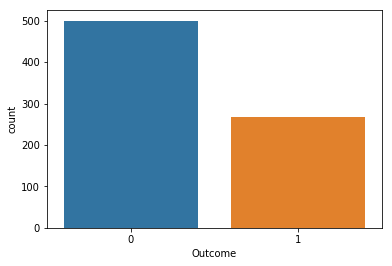

In [139]:
sns.countplot(diabetesDF['Outcome'],label="Count")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c50423160>,
      dtype=object)

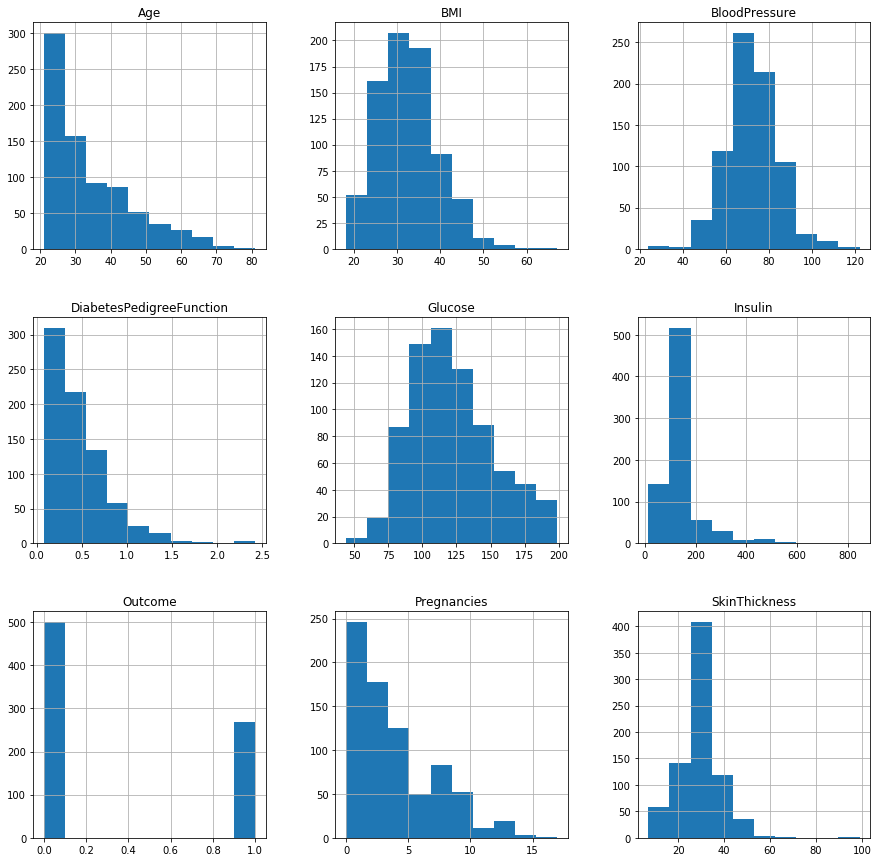

In [140]:
diabetesDF.hist(figsize=(15,15))

# Training and Evaluating Machine Learning Model

In [0]:
# split into train and test 
dfTrain =diabetesDF[:700]
dfTest = diabetesDF[700:750]
dfCheck=diabetesDF[750:]

In [0]:
# Séparation de l'étiquette et les fonctionnalités, pour les ensembles d'apprentissages et de test. 
# Conversion en tableau numpy cer les données seront gérés par l'algorithme d'apprentissage au format tableau numpy
trainLabel= np.asarray(dfTrain['Outcome'])
trainData=  np.asarray(dfTrain.drop('Outcome',1)) 
testLabel= np.asarray(dfTest['Outcome'])
testData=  np.asarray(dfTest.drop('Outcome',1))

In [0]:
# Normalisation des données
# Séparation de l'étiquette et les fonctionnalités, pour les ensembles d'apprentissages et de test. 
# Conversion en tableau numpy car les données seront gérées par l'algorithme d'apprentissage au format tableau numpy

means= np.mean(trainData, axis=0)
stds= np.std(trainData, axis=0)

trainData= (trainData - means)/stds
testData= (testData - means)/stds

In [144]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  82.0 %


Text(0.5, 0, 'Importance')

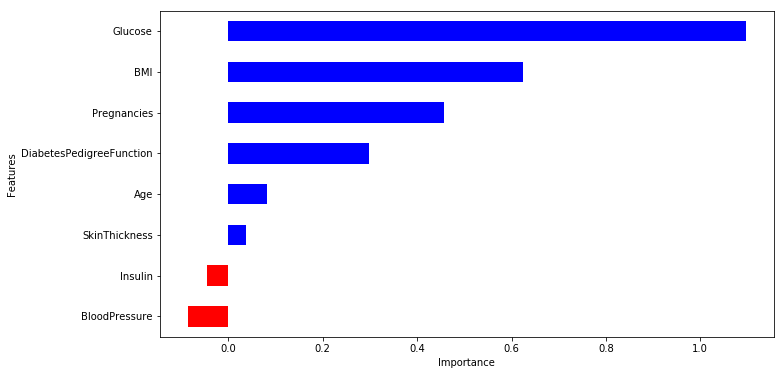

In [146]:
coeff = list(diabetesCheck.coef_[0])
labels = list(dfTrain.drop('Outcome',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [147]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

In [148]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  82.0 %


In [149]:
sampleData = dfCheck[:1]
 
# prepare sample  
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.46643204 0.53356796]]
prediction: [1]
